<a href="https://colab.research.google.com/github/sanjayparajuli/colab/blob/main/visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dial_codes = [
    (880, 'Bangladesh'),
    (55,  'Brazil'),
    (86,  'China'),
    (91,  'India'),
    (62,  'Indonesia'),
    (81,  'Japan'),
    (234, 'Nigeria'),
    (92,  'Pakistan'),
    (7,   'Russia'),
    (1,   'United States'),
]

country_dial = {
    country: code for code, country in dial_codes
}
country_upper = {
    country.upper(): code for code, country in dial_codes if code < 70
}
country_upper

{'BRAZIL': 55, 'INDONESIA': 62, 'RUSSIA': 7, 'UNITED STATES': 1}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
dial_codes = [
    (880, 'Bangladesh'),
    (55,  'Brazil'),
    (86,  'China'),
    (91,  'India'),
    (62,  'Indonesia'),
    (81,  'Japan'),
    (234, 'Nigeria'),
    (92,  'Pakistan'),
    (7,   'Russia'),
    (1,   'United States'),
]

country_dial = {
    country: code for code, country in dial_codes
}
country_dial

def my_code():
  return {
      country.upper(): code for code, country in dial_codes if code < 70
  }
my_code()

def book_code():
  return {
      code: country.upper() for country, code in sorted(country_dial.items()) if code < 70
  }
book_code()

{55: 'BRAZIL', 62: 'INDONESIA', 7: 'RUSSIA', 1: 'UNITED STATES'}

In [ ]:
n_values = np.logspace(1, 5, 100, base=10, dtype=int)
your_time_theory = n_values
print(your_time_theory)
other_time_norm = n_values * np.log2(n_values)
print('------------------------------------')
print(other_time_norm)

[    10     10     12     13     14     15     17     19     21     23
     25     27     30     33     36     40     44     48     53     58
     64     70     77     84     93    102    112    123    135    148
    162    178    196    215    236    259    284    312    343    376
    413    453    497    546    599    657    722    792    869    954
   1047   1149   1261   1384   1519   1668   1830   2009   2205   2420
   2656   2915   3199   3511   3853   4229   4641   5094   5590   6135
   6734   7390   8111   8902   9770  10722  11768  12915  14174  15556
  17073  18738  20565  22570  24770  27185  29836  32745  35938  39442
  43287  47508  52140  57223  62802  68926  75646  83021  91116 100000]
------------------------------------
[3.32192809e+01 3.32192809e+01 4.30195500e+01 4.81057163e+01
 5.33029689e+01 5.86033589e+01 6.94868683e+01 8.07106228e+01
 9.22386659e+01 1.04041925e+02 1.16096405e+02 1.28381963e+02
 1.47206718e+02 1.66465006e+02 1.86117300e+02 2.12877124e+02
 2.40214

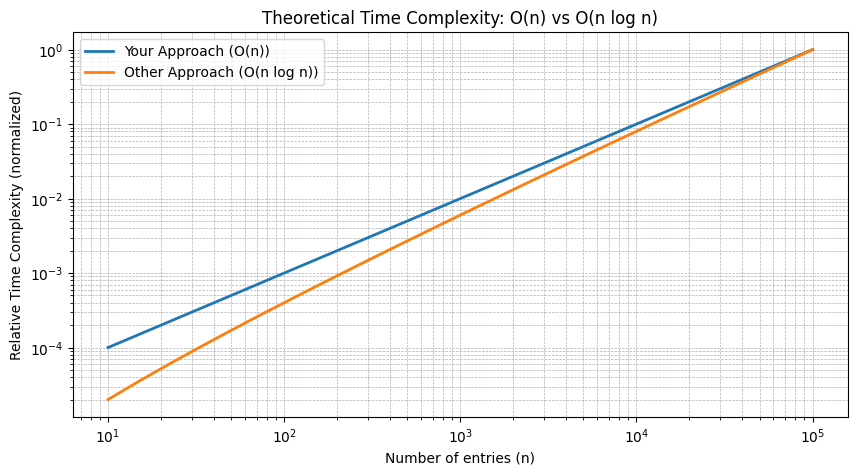

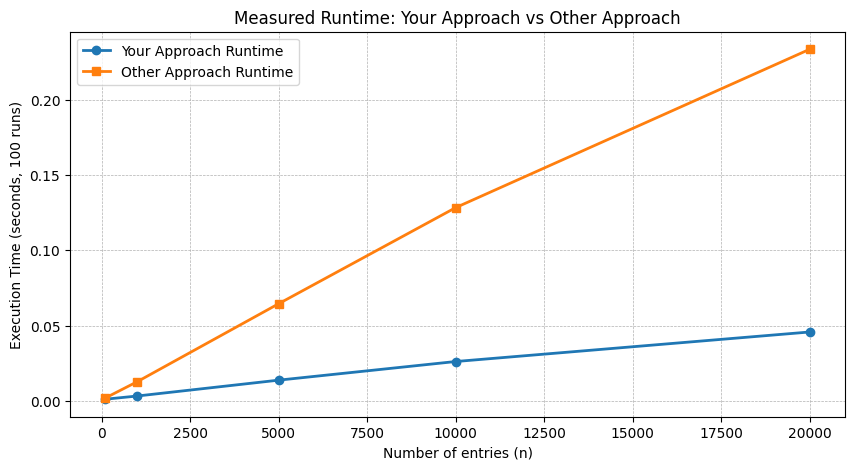

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

# ----------------------------
# Original Data
# ----------------------------
dial_codes = [
    (880, 'Bangladesh'),
    (55,  'Brazil'),
    (86,  'China'),
    (91,  'India'),
    (62,  'Indonesia'),
    (81,  'Japan'),
    (234, 'Nigeria'),
    (92,  'Pakistan'),
    (7,   'Russia'),
    (1,   'United States'),
]

country_dial = {
    country: code for code, country in dial_codes
}

# ----------------------------
# Your approach
# ----------------------------
def your_approach():
    return {country.upper(): code for code, country in dial_codes if code < 70}

# ----------------------------
# Other approach
# ----------------------------
def other_approach():
    return {code: country.upper() for country, code in sorted(country_dial.items()) if code < 70}

# ----------------------------
# Theoretical Complexity (O(n) vs O(n log n))
# ----------------------------
n_values = np.logspace(1, 5, 100, base=10, dtype=int)  # from 10 to 100,000
your_time_theory = n_values
other_time_theory = n_values * np.log2(n_values)

# Normalize for visualization
your_time_norm = your_time_theory / max(your_time_theory)
other_time_norm = other_time_theory / max(other_time_theory)

plt.figure(figsize=(10, 5))
plt.plot(n_values, your_time_norm, label="Your Approach (O(n))", linewidth=2)
plt.plot(n_values, other_time_norm, label="Other Approach (O(n log n))", linewidth=2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of entries (n)")
plt.ylabel("Relative Time Complexity (normalized)")
plt.title("Theoretical Time Complexity: O(n) vs O(n log n)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# ----------------------------
# Practical Runtime Measurement
# ----------------------------
# We'll artificially scale data for larger n
def generate_data(n):
    return [(i, f"Country{i}") for i in range(n)]

sizes = [100, 1000, 5000, 10000, 20000]
your_times = []
other_times = []

for n in sizes:
    test_data = generate_data(n)
    test_dict = {f"Country{i}": i for i in range(n)}

    # Measure your approach
    t1 = timeit.timeit(lambda: {country.upper(): code for code, country in test_data if code < 70}, number=100)
    your_times.append(t1)

    # Measure other approach
    t2 = timeit.timeit(lambda: {code: country.upper() for country, code in sorted(test_dict.items()) if code < 70}, number=100)
    other_times.append(t2)

# ----------------------------
# Plot Practical Runtime
# ----------------------------
plt.figure(figsize=(10, 5))
plt.plot(sizes, your_times, marker="o", label="Your Approach Runtime", linewidth=2)
plt.plot(sizes, other_times, marker="s", label="Other Approach Runtime", linewidth=2)
plt.xlabel("Number of entries (n)")
plt.ylabel("Execution Time (seconds, 100 runs)")
plt.title("Measured Runtime: Your Approach vs Other Approach")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()
